# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [281]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [282]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [283]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [284]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [285]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-04T13:01:29+0300',
 'created_at': '2023-03-04T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [286]:
data['found']

256

Количество страниц в результатах поиска

In [287]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [288]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-04T13:01:29+0300,2023-03-04T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [289]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [290]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [297]:
URL = 'https://api.hh.ru/vacancies'



data = pd.DataFrame()

for i in range(10):
    params = {
        'text': "Data Scientist OR data* OR анали* OR данны*",
        'area': 1,
        'page': i,
        'per_page': 100
    }
    req = requests.get(URL, params)
    data = pd.concat([data, pd.DataFrame(json.loads(req.content.decode()))])

In [298]:
df = pd.json_normalize(data['items'])

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [299]:
df = df.astype(str).drop_duplicates()

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [300]:
vacancies_df = pd.DataFrame()

for i in range(df['id'].count()):
    sleep(0.5)
    vacancy = df['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    vacancies_df = pd.concat([vacancies_df, pd.DataFrame([vacancy_info])], ignore_index=True)

Заведем новую переменную для удобства проверки и нейтрализации потребности повторных запросов.

In [415]:
vacancies = vacancies_df

Убеерем столбцы с неинформативным содержанием(везде None или пустой список)

In [416]:
for column in vacancies.columns:
    vacancies[column] = vacancies[column].apply(lambda x: None if (str(x) == 'None') or (str(x) == '[]') else x)

vacancies = vacancies.dropna(axis=1, how='all')
vacancies

,id,premium,billing_type,name,insider_interview,response_letter_required,area,salary,type,address,...,initial_created_at,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,74376536,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",Data scientist,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 240000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Походный проезд'...",...,2022-12-29T12:15:51+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/74376536,None,None,None,False,None
1,76536709,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",Data Scientist (LTV),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,2023-02-02T10:39:25+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/76536709,None,None,None,False,None
2,77208642,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",Data Scientist middle+/Senior,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 250000, 'to': 350000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,2023-02-20T12:06:39+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77208642,None,None,None,False,None
3,75546364,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",Эконометрист/Data scientist (Junior/Middle) в ...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 40000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Замоскворецкая л...",...,2023-01-09T12:41:38+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/75546364,None,None,None,False,None
4,77656659,False,"{'id': 'standard', 'name': 'Стандарт'}",Data Scientist,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,2023-03-03T16:15:22+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77656659,None,None,None,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,76163248,False,"{'id': 'standard', 'name': 'Стандарт'}",Системный аналитик (начинающий уровень ),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,2023-01-24T17:59:24+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/76163248,None,None,None,False,None
996,76342686,False,"{'id': 'standard', 'name': 'Стандарт'}",Главный специалист Отдела аналитики и верифика...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,2023-01-27T16:00:58+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/76342686,None,None,None,False,None
997,77331462,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",Системный аналитик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Варшавское шоссе...",...,2023-02-22T14:52:40+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77331462,None,None,None,False,"[{'id': 'eng', 'name': 'Английский', 'level': ..."
998,77652216,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",Химик-аналитик в физико-химическое подразделение,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 60000, 'to': 70000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Королёв', 'street': 'микрорайон Подл...",...,2023-03-03T14:52:32+0300,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://

In [417]:
writer = pd.ExcelWriter('~/Documents/Phystech/AD/4task/hh_vacancies.xlsx')
vacancies.to_excel(writer, sheet_name='Sheet1')
writer.save()

/tmp/ipykernel_2162/3551270191.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [418]:
data['found']

0     66598
1     66598
2     66598
3     66598
4     66598
      ...  
95    66598
96    66598
97    66598
98    66598
99    66598
Name: found, Length: 1000, dtype: int64

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [419]:
skills = dict()

for i in range(vacancies['id'].count()):
    if vacancies['key_skills'].iloc[i] is not None:
        for x in vacancies['key_skills'].iloc[i]:
            skills.setdefault(x['name'], 0)
            skills[x['name']] += 1
        
skills_df = pd.DataFrame.from_dict([skills])

Объединим наиболее популярные названия одних и тех же профессий: 

In [420]:
skills_df = skills_df.rename(columns={'Machine Learning': 'ML', 'Машинное обучение': 'ML'})
skills_df = skills_df.rename(columns={'Математическая статистика': 'Statistics', 'Статистика': 'Statistics'})
skills_df = skills_df.rename(columns={'Аналитические исследования': 'Analysis', 'Системный анализ': 'Analysis', 'Работа с большим объемом информации': 'Analysis', 'Big Data': 'Analysis', 'Анализ данных': 'Analysis', 'Data Analysis': 'Analysis'})
skills_df = skills_df.rename(columns={'Аналитическое мышление': 'Аналитическое\nмышление'})
skills_df = skills_df.rename(columns={'Математическое моделирование': 'Мат.\nмод.'})
skills_df = skills_df.rename(columns={'MS PowerPoint': 'PowerPoint'})
skills_df = skills_df.rename(columns={'MS Excel': 'Excel'})
skills_df = skills_df.rename(columns={'Базы данных': 'БД'})
skills_df = skills_df.rename(columns={'Английский язык': 'English'})

In [421]:
skills_df = skills_df.transpose().reset_index().rename(columns={'index': 'Skill', 0: 'Count'})
skills_df = skills_df.groupby('Skill').sum().reset_index()
skills_df = skills_df.sort_values('Count', ascending=False)

Text(0.5, 1.0, 'Number of skills')

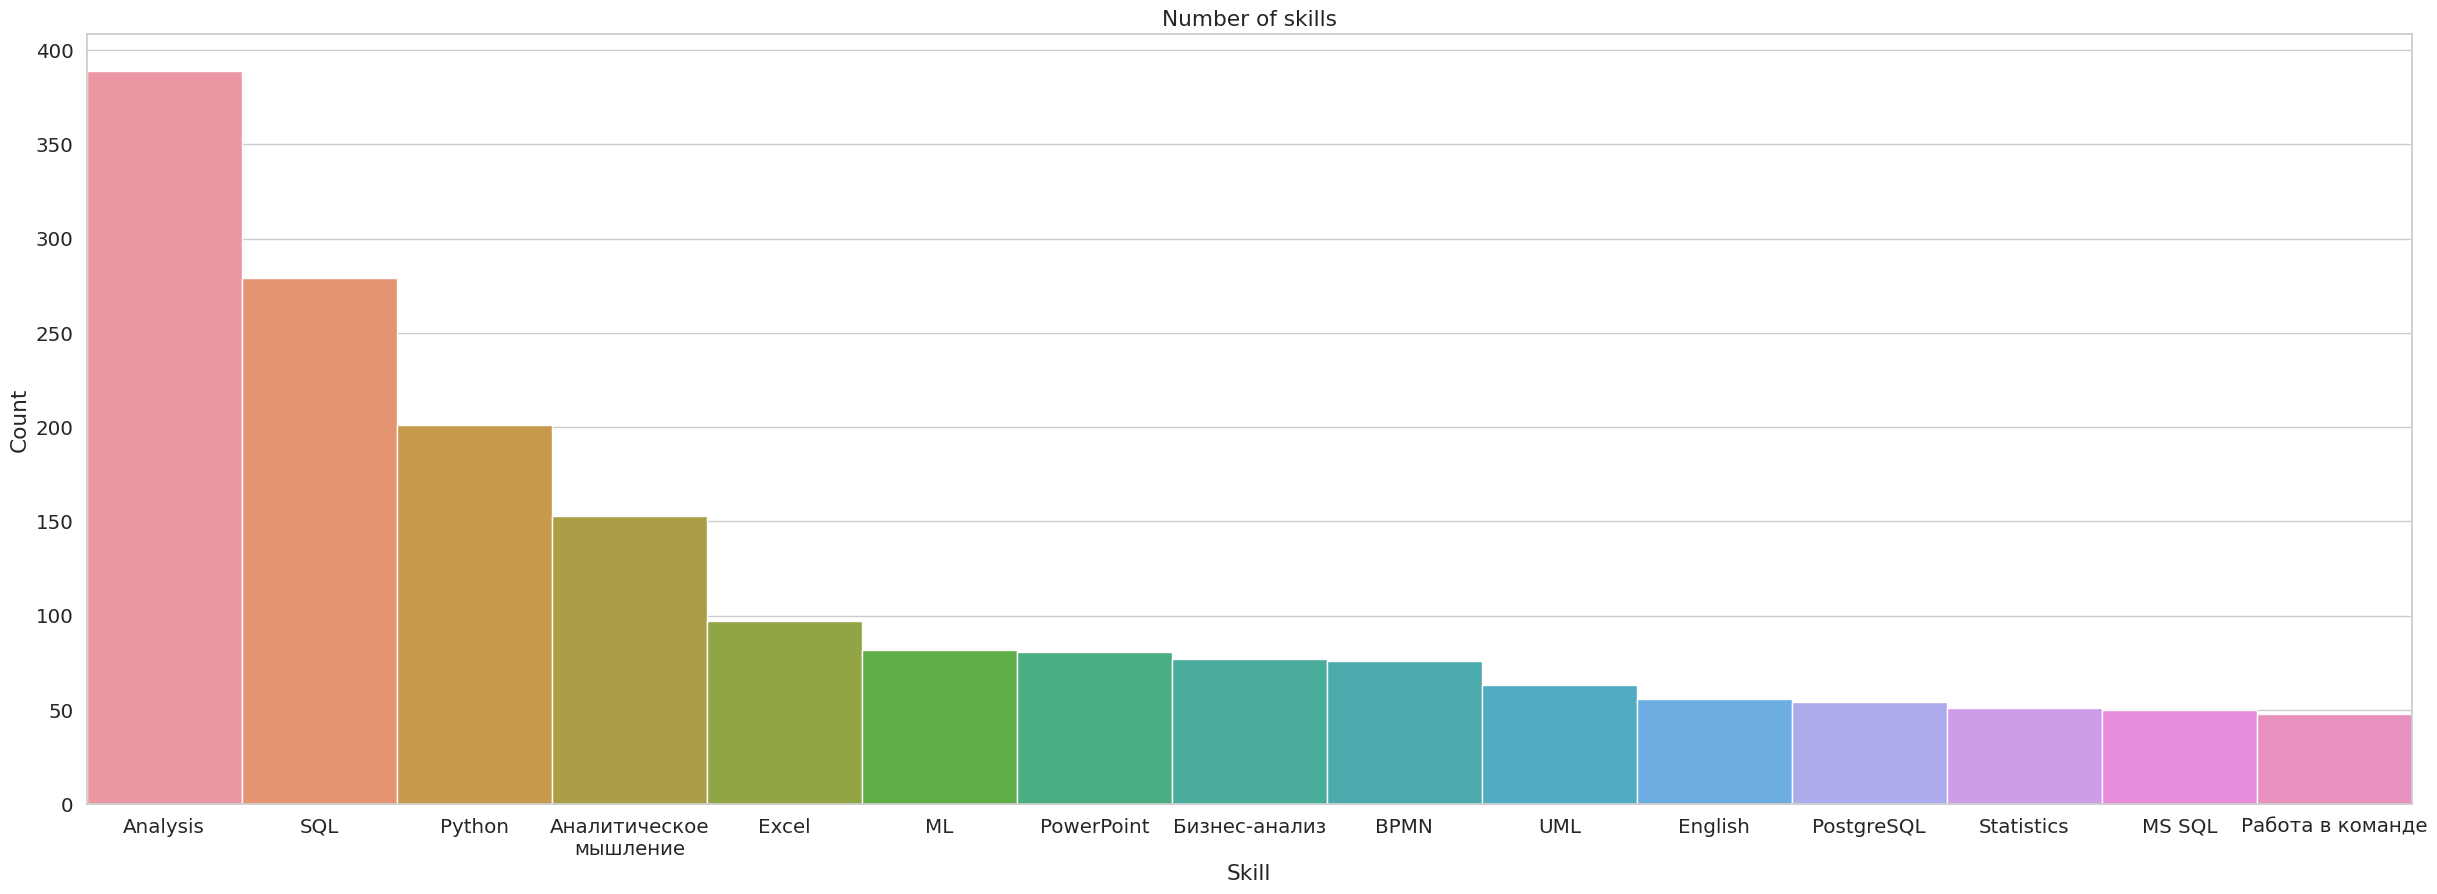

In [422]:
fig,ax = plt.subplots(figsize=(30, 10))
sns.barplot(skills_df[:15], x='Skill', y='Count', width=1)
ax.set_title('Number of skills')

Наиболее популярными навыками являются знание языков Python, Sql и опыт работы с данными.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [423]:
vacancies = vacancies.dropna(subset='salary')

Введем актуальную зарплату, в которой будет храниться среднее значение диапазона зарплат в рублях после вычета налогов.

In [424]:
def to_actual_salary(vacancy):
    if vacancy['to'] is None:
        sal = vacancy['from']
    elif vacancy['from'] is None:
        sal = vacancy['to']
    else:
        sal = (vacancy['from'] + vacancy['to']) / 2
    if vacancy['currency'] == 'EUR':
        sal *= 80.30
    if vacancy['currency'] == 'USD':
        sal *= 75.40
    if vacancy['gross'] == True:
        sal *= 0.85
    return sal

vacancies['act_salary'] = vacancies['salary'].apply(to_actual_salary)

/tmp/ipykernel_2162/2235108550.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacancies['act_salary'] = vacancies['salary'].apply(to_actual_salary)


Text(0.5, 1.0, 'Salary distribution')

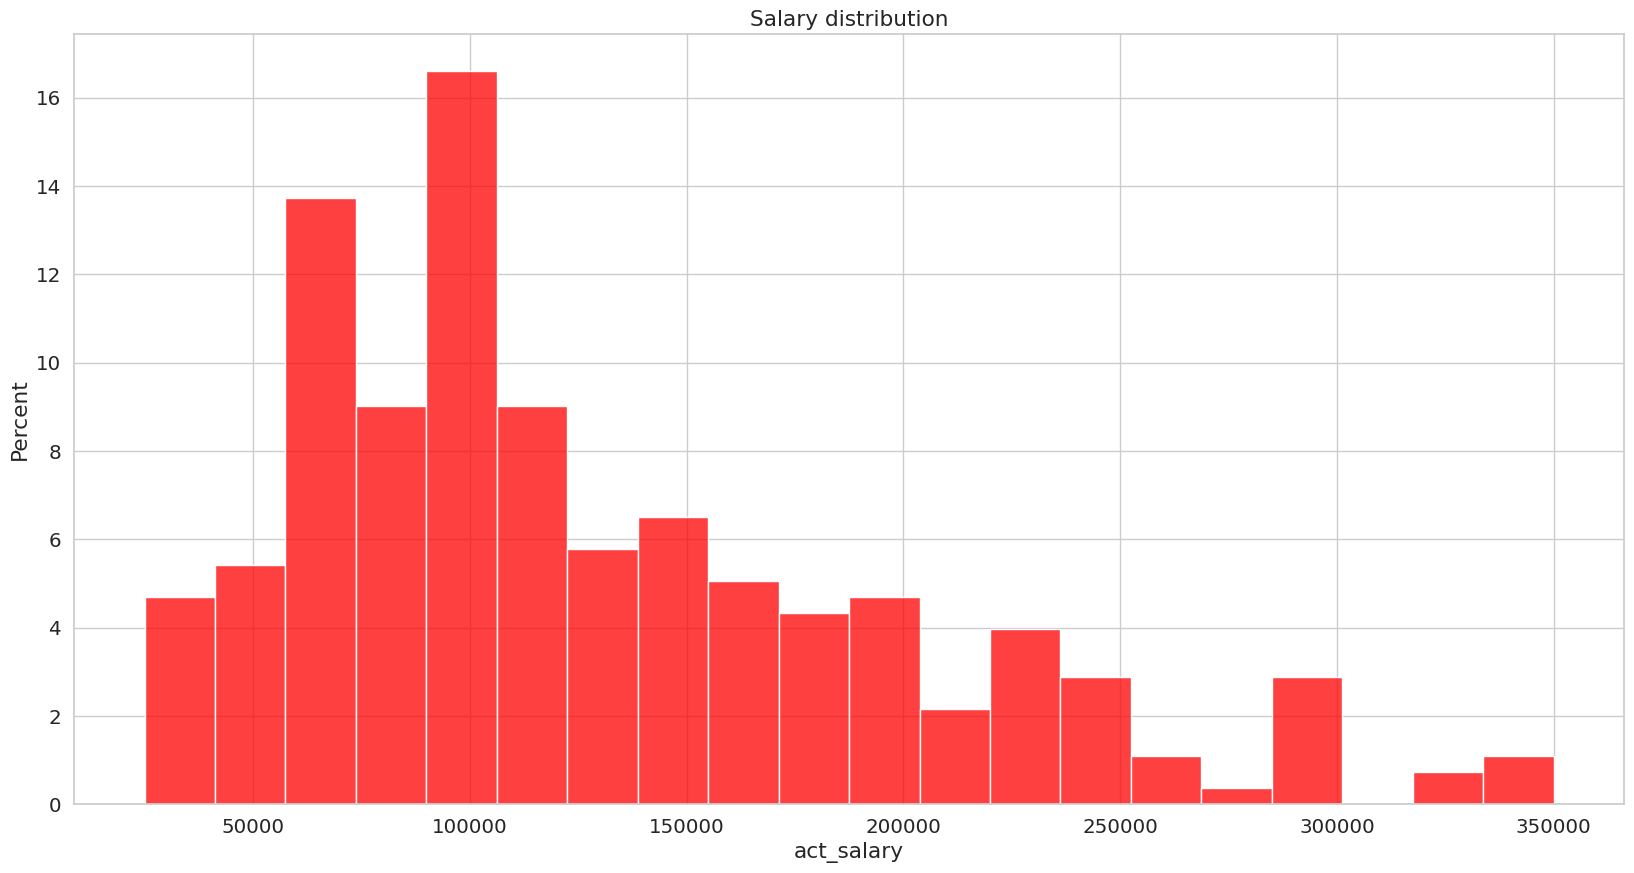

In [425]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.histplot(vacancies, x='act_salary', bins=20, color='Red', stat='percent')
ax.set_title('Salary distribution')

Наиболе часто среди вакансий встречается зарплата 100000 рублей. Так же популярной является зарплата 70000 рублей. Более 350000 рублей же аналитики данных почти не получают.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Получим новые данные:

In [319]:
URL = 'https://api.hh.ru/vacancies'



data2 = pd.DataFrame()

for i in range(10):
    params = {
        'text': "юри* OR lawyer",
        'area': 1,
        'page': i,
        'per_page': 100
    }
    req = requests.get(URL, params)
    data2 = pd.concat([data2, pd.DataFrame(json.loads(req.content.decode()))])

In [320]:
df2 = pd.json_normalize(data2['items'])

In [321]:
df2 = df2.astype(str).drop_duplicates()

In [322]:
vacancies_df2 = pd.DataFrame()

for i in range(df2['id'].count()):
    sleep(0.5)
    vacancy2 = df2['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy2}'
    req = requests.get(vacancy_url)
    vacancy_info2 = json.loads(req.content.decode())
    vacancies_df2 = pd.concat([vacancies_df2, pd.DataFrame([vacancy_info2])], ignore_index=True)


Как в прошлый раз заведем еще 1 переменную чтобы не тревожить сайт лишний раз

In [426]:
vacancies2 = vacancies_df2

Уберем ненужные столбцы(те, в которых все значения None или пустой список)

In [427]:
for column in vacancies2.columns:
    vacancies2[column] = vacancies2[column].apply(lambda x: None if (str(x) == 'None') or (str(x) == '[]') else x)

vacancies2 = vacancies2.dropna(axis=1, how='all')

In [428]:
writer = pd.ExcelWriter('~/Documents/Phystech/AD/4task/hh_vacancies2.xlsx')
vacancies2.to_excel(writer, sheet_name='Sheet1')
writer.save()

/tmp/ipykernel_2162/3996394225.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


Находим количество упоминаний каждого навыка путем создания словаря навыков

In [429]:
skills2 = dict()

for i in range(vacancies2['id'].count()):
    if vacancies2['key_skills'].iloc[i] is not None:
        for x in vacancies2['key_skills'].iloc[i]:
            skills2.setdefault(x['name'], 0)
            skills2[x['name']] += 1
        
skills_df2 = pd.DataFrame.from_dict([skills2])

Строим гистограмму количества навыков

In [430]:
skills_df2 = skills_df2.rename(columns={'Деловая переписка': 'Переписка'})
skills_df2 = skills_df2.rename(columns={"Заключение договоров": "Договоры","Согласование договоров": "Договоры", 'Договорная работа': 'Договоры', 'Составление договоров': 'Договоры'})
skills_df2 = skills_df2.rename(columns={'Претензионная работа': 'Претенз. раб.'})
skills_df2 = skills_df2.rename(columns={'Деловое общение': 'Дел.общ.'})
skills_df2 = skills_df2.rename(columns={"Консультирование": "Консультации", 'Консультант плюс': 'Консультации', "Консультант+" : "Консультации"})
skills_df2 = skills_df2.rename(columns={'Грамотная речь': 'Грамотность'})
skills_df2 = skills_df2.rename(columns={'Работа с большим объемом информации': 'Работосп.'})
skills_df2 = skills_df2.rename(columns={'Гражданское право': 'Гражд. прав.'})
skills_df2 = skills_df2.rename(columns={'Юридическая поддержка': 'Юр. под.'})
skills_df2 = skills_df2.rename(columns={'Ведение переговоров': 'Переговоры'})
skills_df2 = skills_df2.rename(columns={'Арбитражные суды': 'Арбитраж'})
skills_df2 = skills_df2.rename(columns={'Пользователь ПК': 'ПК'})
skills_df2 = skills_df2.rename(columns={'Мониторинг законодательства': 'Мониторинг'})
skills_df2 = skills_df2.rename(columns={'Гражданский кодекс РФ': 'ГК РФ'})
skills_df2 = skills_df2.rename(columns={'Знание законодательства РФ': 'Знание зак.'})
skills_df2 = skills_df2.rename(columns={'Работа в команде': 'Раб. в ком.'})
skills_df2 = skills_df2.rename(columns={'Работа с юридическими лицами': 'Раб. с юр.\nлиц.'})
skills_df2 = skills_df2.rename(columns={'Юридическое сопровождение': 'Юридическое\nсопровождение'})
skills_df2 = skills_df2.rename(columns={'Составление исков': 'Составление\nисков'})

In [431]:
skills_df2 = skills_df2.transpose().reset_index().rename(columns={'index': 'Skill', 0: 'Count'})
skills_df2 = skills_df2.groupby('Skill').sum().reset_index()
skills_df2 = skills_df2.sort_values('Count', ascending=False)

Text(0.5, 1.0, 'Number of skills')

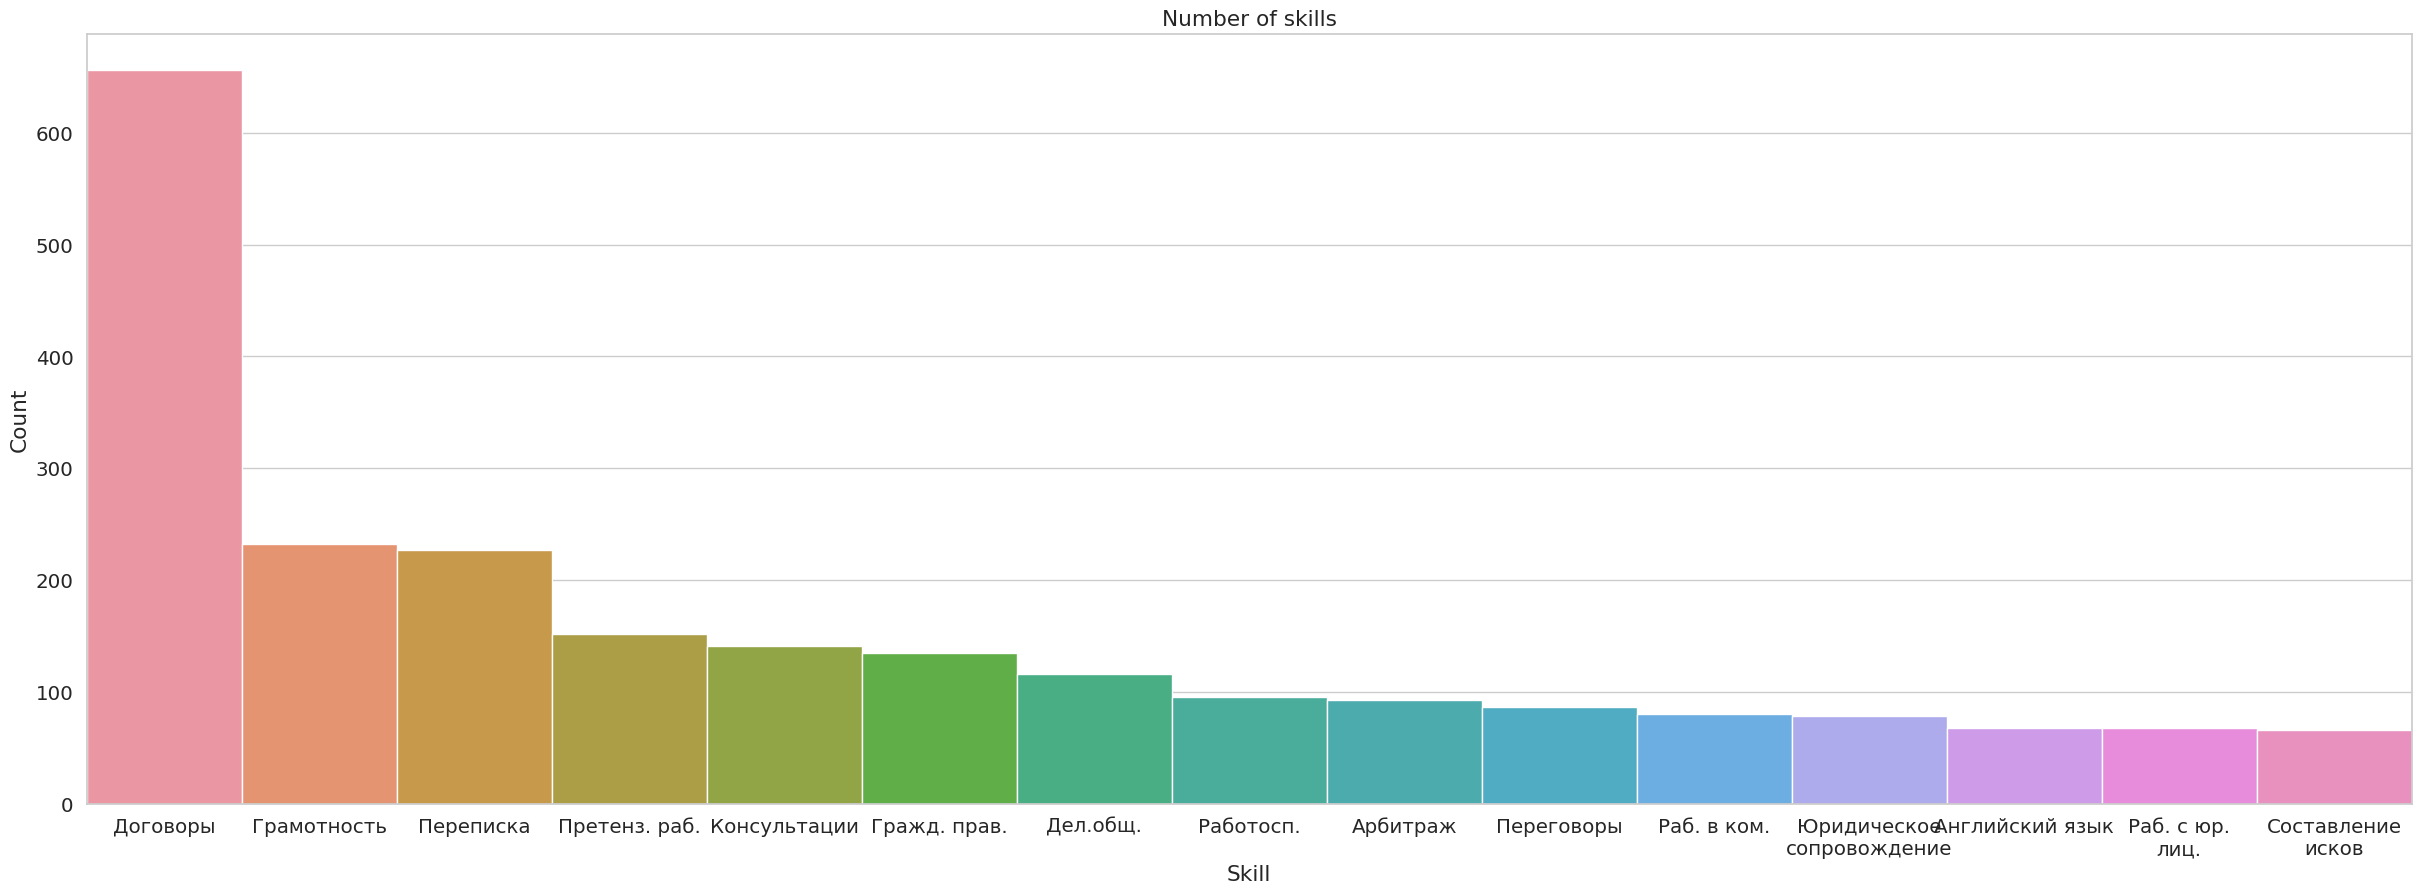

In [432]:
fig,ax = plt.subplots(figsize=(30, 10))
sns.barplot(skills_df2[:15], x='Skill', y='Count', width=1)
ax.set_title('Number of skills')

Наиболее популярным и востребованным навыком в юридической сфере с большим отрывом является умение заключать договоры, остальные навыки востребованы примерно одинаково.

Находим распределение зарплат

In [433]:
vacancies2 = vacancies2.dropna(subset='salary')

In [434]:
def to_actual_salary(vacancy):
    if vacancy['to'] is None:
        sal = vacancy['from']
    elif vacancy['from'] is None:
        sal = vacancy['to']
    else:
        sal = (vacancy['from'] + vacancy['to']) / 2
    if vacancy['currency'] == 'EUR':
        sal *= 80.30
    if vacancy['currency'] == 'USD':
        sal *= 75.40
    if vacancy['gross'] == True:
        sal *= 0.85
    return sal

vacancies2['act_salary'] = vacancies2['salary'].apply(to_actual_salary)

Строим гистограмму

(0.0, 200000.0)

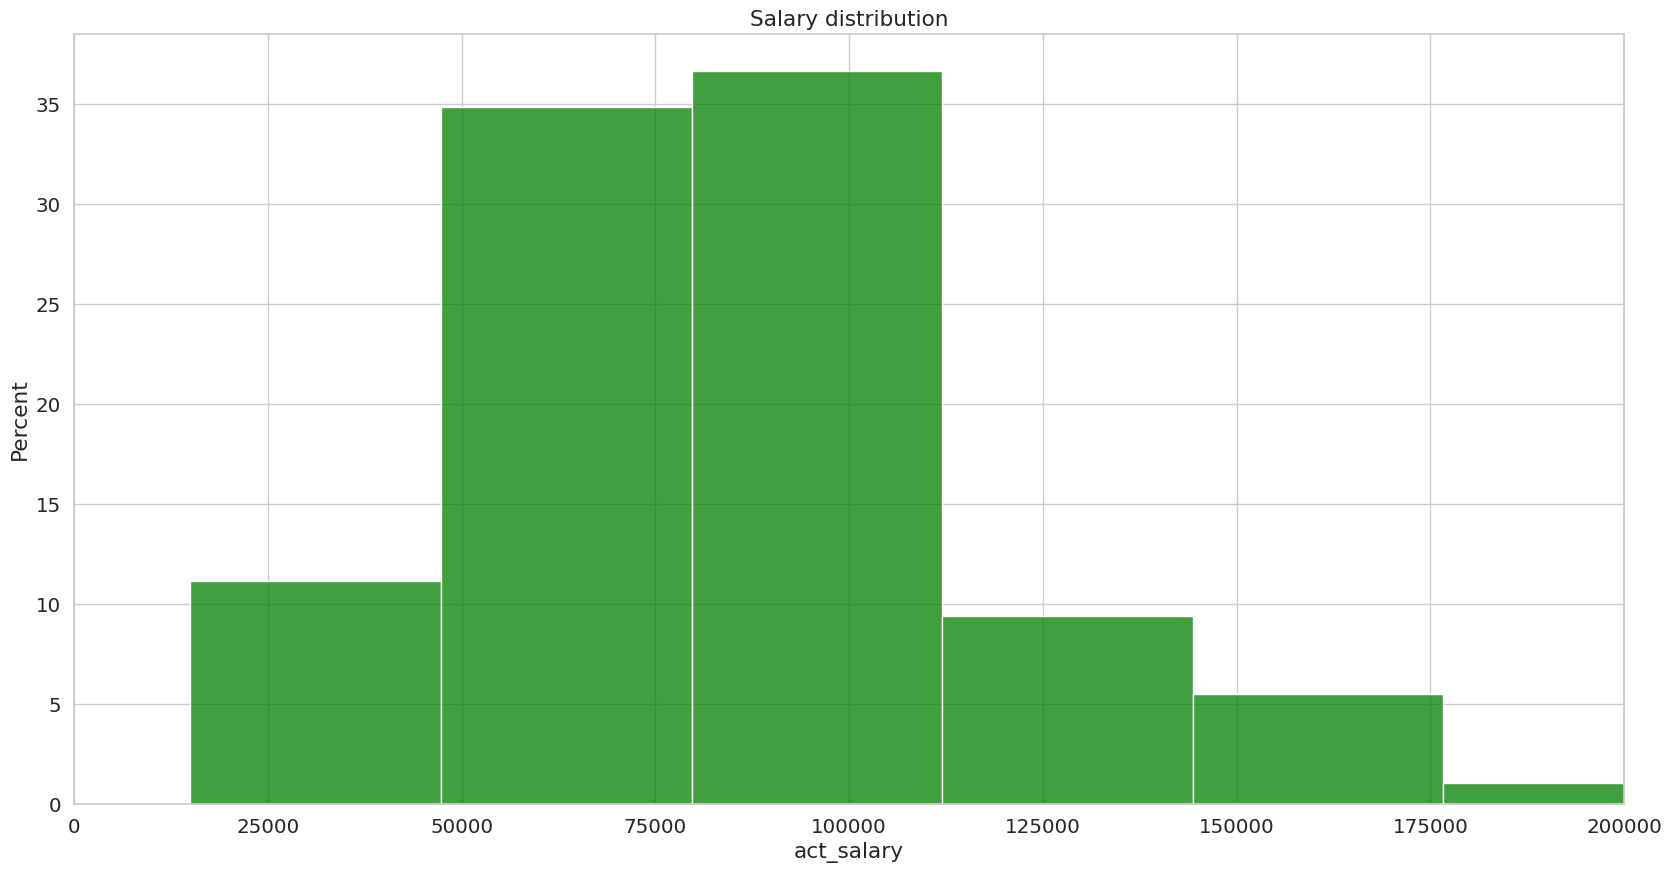

In [435]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.histplot(vacancies2, x='act_salary', bins=15, color='Green', stat='percent')
ax.set_title('Salary distribution')
ax.set_xlim((0,200000))

Можно заметить, что наибольшее количество вакансий юристов имеет среднюю зарплату 90000 рублей. В то же время очень малое количество юристов получает более 200000 рублей.

Не забывайте про выводы.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [ ]:
...

Какие выводы можно сделать из построенных графиков?

<...>